In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [17]:
dataset = pd.read_csv("dane_symulacyjne_dla_modelu_AI.csv")
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, -2].values

In [18]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3, 13, 18])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
ann = tf.keras.models.Sequential()

In [23]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [26]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [28]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
25/25 [==============================] - 1s 959us/step - loss: 0.6097 - accuracy: 0.7563
Epoch 2/100
25/25 [==============================] - 0s 918us/step - loss: 0.5025 - accuracy: 0.8763
Epoch 3/100
25/25 [==============================] - 0s 918us/step - loss: 0.4216 - accuracy: 0.8888
Epoch 4/100
25/25 [==============================] - 0s 918us/step - loss: 0.3569 - accuracy: 0.8900
Epoch 5/100
25/25 [==============================] - 0s 876us/step - loss: 0.3089 - accuracy: 0.8900
Epoch 6/100
25/25 [==============================] - 0s 792us/step - loss: 0.2747 - accuracy: 0.8888
Epoch 7/100
25/25 [==============================] - 0s 792us/step - loss: 0.2516 - accuracy: 0.8850
Epoch 8/100
25/25 [==============================] - 0s 834us/step - loss: 0.2349 - accuracy: 0.8838
Epoch 9/100
25/25 [==============================] - 0s 917us/step - loss: 0.2217 - accuracy: 0.8813
Epoch 10/100
25/25 [==============================] - 0s 876us/step - loss: 0.2126 - accura

In [29]:
y_pred = ann.predict(X_test) > 0.5
print(np.hstack((y_pred, y_test[:, np.newaxis])))

7/7 [==============================] - 0s 667us/step
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [

In [30]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[165  11]
 [ 14  10]]


0.875

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

Accuracy: 87.50%


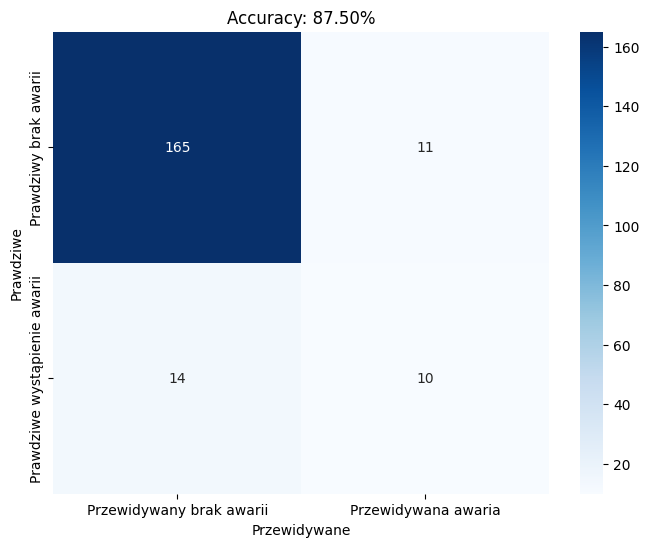

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Przewidywany brak awarii', 'Przewidywana awaria'], yticklabels=['Prawdziwy brak awarii', 'Prawdziwe wystąpienie awarii'])
plt.title(f'Accuracy: {accuracy:.2%}')
plt.xlabel('Przewidywane')
plt.ylabel('Prawdziwe')
plt.show()
